In [2]:
# 4-1. 프로젝트: 뉴스기사 요약해보기

# 새로운 데이터셋에 대해서 추상적 요약과 추출적 요약을 모두 해보는 시간을 가져봐요.

# 먼저 주요 라이브러리 버전을 확인해 보죠.

from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas
import pandas as pd  
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords


# nltk 불용어 다운로드
nltk.download('stopwords')


print(nltk.__version__)
print(tensorflow.__version__)
print(pandas.__version__)
print(version('summa'))

3.6.5
2.6.0
1.3.3
1.2.0


[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Step 1. 데이터 수집하기
# 데이터는 아래 링크에 있는 뉴스 기사 데이터(news_summary_more.csv)를 사용하세요.

# sunnysai12345/News_Summary
# 아래의 코드로 데이터를 다운로드할 수 있어요.

import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [4]:
data.sample(10)

,headlines,text
37675,"Who is Sandeep Bakhshi, the new ICICI Bank COO?","Sandeep Bakhshi, the new Chief Operating Offic..."
8904,Biggest blunder of my career was to launch Dis...,Bajaj Auto MD Rajiv Bajaj has described the la...
68674,18-yr-old shuttler dies at Sports Authority of...,An 18-year-old badminton player collapsed and ...
4333,Trump vows to cut aid to Central American nati...,US President Donald Trump has vowed to cut aid...
83206,Drugs worth over $1bn set on fire in three Asi...,"Thailand, Myanmar, and Cambodia have burned ne..."
72726,Bangladesh defeat Australia for the 1st time i...,Bangladesh registered its first ever Test win ...
2361,Bill to end Pak 'Major non-NATO ally' status t...,Republican Congressman Andy Biggs has introduc...
37869,Should PM react if some dog dies: Muthalik on ...,Speaking about questions on PM Narendra Modi's...
26331,Startup that raised $2.3 bn to sell 1st AR hea...,US-based augmented reality (AR) startup Magic ...
59245,Japanese brand apologises over 'No Chinese' si...,"Pola, a Japanese cosmetic brand, has apologise..."


In [5]:
# Step 2. 데이터 전처리하기 (추상적 요약)

# 실습에서 사용된 전처리를 참고하여 각자 필요하다고 생각하는 전처리를 추가 사용하여 텍스트를 정규화 또는 정제해 보세요. 
# 만약, 불용어 제거를 선택한다면 상대적으로 길이가 짧은 요약 데이터에 대해서도 불용어를 제거하는 것이 좋을지 고민해 보세요.

In [6]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=3


In [8]:
# S<데이터 수집하기>

# 데이터는 아래 링크에 있는 뉴스 기사 데이터(news_summary_more.csv)를 사용하세요.

# sunnysai12345/News_Summary
# 아래의 코드로 데이터를 다운로드할 수 있어요.

import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [9]:
data.sample(10)

,headlines,text
54558,Russia slams US' plan to sell anti-missile sys...,Russia on Thursday slammed the US over its pla...
32105,"Japan, N Korea should normalise relations: S K...",Japan and North Korea should begin talks to no...
22728,Jet Airways plane tries to take off from taxiw...,Saudi Arabia's Aviation Investigation Bureau h...
88602,I would love to play role of goddess Sita onsc...,Alia Bhatt has said she would love to play the...
28753,Jio takes $1 billion loan to pay Samsung for e...,Reliance Jio has secured $1-billion worth of t...
14318,Impossible for me to work with such people: Hr...,Reacting to sexual harassment allegations agai...
34143,Man standing on Mumbai platform pushed to deat...,A CCTV footage has revealed that a 56-year-old...
79482,"William, Kate try to get Game of Thrones spoil...","The Duke and Duchess of Cambridge, Prince Will..."
88600,I will always be the naked girl on a wrecking ...,"Miley Cyrus, while talking about her music vid..."
93987,Army was cheated to pay rent for land in PoK: ...,Defence Minister Arun Jaitley on Tuesday said ...


In [ ]:
'''
이 데이터는 기사의 본문에 해당되는 text와 headlines 두 가지 열로 구성되어져 있습니다.

추상적 요약을 하는 경우에는 text를 본문, headlines를 이미 요약된 데이터로 삼아서 모델을 학습할 수 있어요. 
추출적 요약을 하는 경우에는 오직 text열만을 사용하세요.

Step 2. 데이터 전처리하기 (추상적 요약)

실습에서 사용된 전처리를 참고하여 각자 필요하다고 생각하는 전처리를 추가 사용하여 텍스트를 정규화 또는 정제해 보세요. 
만약, 불용어 제거를 선택한다면 상대적으로 길이가 짧은 요약 데이터에 대해서도 불용어를 제거하는 것이 좋을지 고민해 보세요.

'''

In [14]:
# 빈칸으로 존재하는 null 데이터, 의미는 같지만 다른 식으로 작성된 글 같은 중복 항목과 같은 학습할 때 방해가 되는 데이터 제거
    
# 중복 샘플과 NULL 값이 존재하는 샘플 제거
# 우선 데이터의 중복 샘플 유무를 확인

print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [15]:
'''
중복을 제외한다면 text에는 98,360 개, headlines에는 98,280개의 유니크한 데이터가 존재한다.
사실 이 데이터의 headlines는 아주 간단한 요약들도 많아서 Text가 달라도 headlines는 동일할 수 있다.
하지만 Text 자체가 중복이 된 경우는 중복 샘플이므로 제거가 필요하다.

데이터프레임의 drop_duplicates()를 사용하면, 손쉽게 중복 샘플을 제거할 수 있다.
'''

# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꾼다.

data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [16]:
'''
중복이 제거되면서 샘플 수가 98,360개로 줄어들었어요. 
그런데 만약 데이터 Null 값을 가지는 샘플이 있었다면, drop_duplicates()가 중복된 Null들을 지워주기는 하겠지만, 
여전히 Null 값 한 개가 어딘가 남아있을 수 있어요. 데이터에 Null 값이 남아있는지 볼게요.

데이터프레임에 Null 값이 있는지 확인하는 방법은 .isnull().sum()을 사용하면 알아볼 수 있어요.

'''

print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [ ]:
# 텍스트 정규화와 불용어 제거

'''
살아남은 88,425개의 샘플에는 수많은 단어들이 있어요. 
그런데 사실 그 단어들 중에서는 같은 의미인데도 다른 표현으로 쓰여 마치 다른 단어들처럼 간주되는 경우가 있어요.

예를 들어서 it'll은 it will과 같고, mustn't과 must not은 사실 같은 표현이죠. 
이런 경우 기계가 굳이 이들을 마치 다른 단어로 간주하게 해서 연산량을 늘리는 것보다는 기계 학습 전에 
미리 같은 표현으로 통일시켜주는 것이 기계의 연산량을 줄일 수 있는 방법이에요.

이러한 방법론을 텍스트 처리에서는 텍스트 정규화(text normalization) 라고 해요.

여기서는 텍스트 정규화를 위한 사전(dictionary)을 아래와 같이 구성할 거예요. 이 사전은 아래의 링크에서 참고하여 만들었어요.

정규화 사전 출처
https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

'''

In [18]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [19]:
'''
이제 정규화 준비까지 마쳤어요.

하지만 아직 끝난 게 아니에요. 일반적으로 텍스트에는 자주 등장하지만 자연어 처리를 할 때 
실질적으로 별 도움이 되지 않는 단어들이 존재해요. 이를 불용어(stopwords)라고 불러요. 때로는 
불용어를 제거하는 것이 자연어 처리의 성능을 높이는 방법일 수 있어요. 
여기서는 NLTK에서 제공하는 불용어 리스트를 참조해, 샘플에서 불용어를 제거할 거예요.

'''

print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [20]:
'''
NLTK에서 미리 정의하여 제공하고 있는 불용어는 총 179개라는 것을 볼 수 있죠. 
이를 사용하여 불용어를 제거할 거예요. 이 작업 외에도 모든 영어 문자는 소문자로 만들고, 
섞여있는 html 태그를 제거하고, 정규 표현식을 통해 각종 특수문자를 제거해서 정말 필요한 내용만 잘 학습할 수 있도록 처리할 거예요.

함수의 하단을 보면, NLTK를 이용해 불용어를 제거하는 파트가 있는데, 이는 text 전처리 시에서만 호출하고 
이미 상대적으로 문장 길이가 짧은 headlines 전처리할 때는 호출하지 않을 예정이에요. Abstractive한 문장 요약 결과문이 
자연스러운 문장이 되려면 이 불용어들이 headlines에는 남아 있는 게 더 좋을 것 같습니다. 
이 처리를 위해서 함수의 인자로 remove_stopwords를 추가하고, if문을 추가했어요.

'''

# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text             # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence)   # 괄호로 닫힌 문자열 (...) 제거  Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence)                         # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])      # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence)                     # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence)               # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence)                # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (headlines)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


In [21]:
# 전처리 전, 후의 결과를 확인하기 위해서 임의의 text와 summary를 만들어 함수를 호출해 볼까요.

temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [25]:
'''
결과를 보면 기본적으로 모든 알파벳이 소문자로 변환되고, <br />과 같은 html 태그가 제거되었죠. 
(or finish)와 같은 괄호로 묶였던 단어 시퀀스가 제거된 것도 확인할 수 있어요. 또한 특수문자가 제거되면서 영어만 남았어요.

이제 함수가 잘 작동하는 것을 확인했으니, 훈련 데이터 전체에 대해서 전처리를 수행해볼게요. 
이때, text의 경우에는 불용어를 제거하고, headlines의 경우에는 불용어를 제거하지 않을 것이므로 
따로 호출해서 진행해야 해요. 먼저 Text를 전처리하고, 결과를 확인하기 위해서 상위 5개의 줄을 출력해볼게요.
'''

# Q. 위의 내용을 참고해서 훈련 데이터 전체의 Text 컬럼의 데이터를 전처리하는 코드를 작성하세요.(반복문 사용)


# 데이터 로드
df = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

# 전체 Text 데이터에 대한 전처리
clean_text = []

for idx, row in df.iterrows():
    cleaned_text = preprocess_sentence(row['text'])
    clean_text.append(cleaned_text)

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [30]:
'''
이제 headlines에 대해서 전처리 함수를 호출해 줄 때는, 
불용어 제거를 수행하지 않는다는 의미에서 두 번째 인자로 False를 넣어줄게요. <----- 중요

Q. 위의 내용을 참고해서 훈련 데이터 전체의 headlines 컬럼의 데이터를 전처리하는 코드를 작성하세요.(반복문 사용)

'''

# 전체 Headlines 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 


clean_headlines = []

# 데이터 로드
df = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

# 전체 Text 데이터에 대한 전처리
clean_headlines = []

for idx, row in df.iterrows():
    cleaned_text = preprocess_sentence(row['headlines'], False)
    clean_text.append(cleaned_text)

# 전처리 후 출력
print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  []


In [34]:
'''
이렇게 텍스트 정제의 과정을 거친 후에는 다시 한번 빈(empty) 샘플이 생겼는지 확인해보는 것이 좋아요. 
정제 전에는 데이터가 존재했지만, 정제 과정에서 문장의 모든 단어가 사라지는 경우가 있을 수 있어요. 
이렇게 되면 샘플 자체가 빈 값을 가지게 되겠죠.

보다 쉽게 확인하기 위해 데이터들을 데이터프레임에 재저장할게요. 빈(empty) 값을 가진 샘플들이 있다면, 
모두 Null 값을 가진 샘플로 대체해요.

'''

data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

ValueError: Length of values (295203) does not match length of index (98360)

In [35]:
# 위 사항에 대한 수정 필요

In [36]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [ ]:
# <훈련데이터와 테스트데이터 나누기>

# 학습을 진행하기 위해서는 학습에 사용할 데이터의 크기를 결정하고, 문장의 시작과 끝을 표시해 줘야 해요.

#샘플의 최대 길이 정하기


#필요 없는 단어를 모두 솎아낸 데이터를 가지게 되었으니, 이제 훈련에 사용할 샘플의 최대 길이를 정해줄 차례에요.
#Text와 Summary의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화해서 볼게요.

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 91
텍스트의 평균 길이 : 58.23813542090281
요약의 최소 길이 : 1
요약의 최대 길이 : 18
요약의 평균 길이 : 9.553660024400163


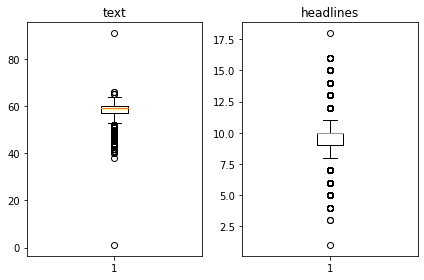

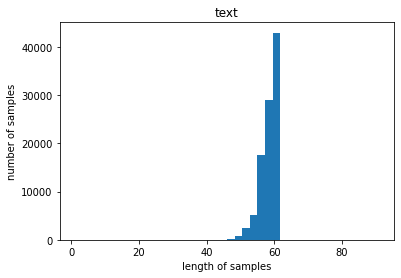

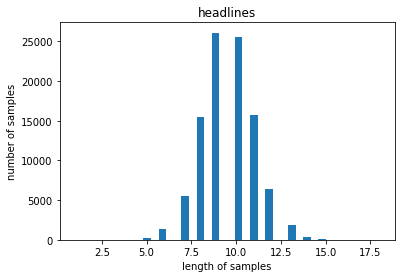

In [38]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [60]:
# <참고 필요>    <--- 아래는 상황에 맞게 조정 필요함

'''
위의 그래프처럼, 많은 양의 데이터를 다룰 때는 데이터를 시각화하여 보는 것이 도움이 돼요. 
위에서부터 차례대로 그래프는 각각 실제 텍스트와 요약의 길이 분포, 실제 텍스트 샘플 길이별 개수, 
요약본 샘플 길이별 개수를 나타내고 있어요.

Text의 경우 최소 길이가 2, 최대 길이가 1,235로 그 차이가 굉장히 크죠. 
하지만 평균 길이는 38로 시각화된 그래프로 봤을 때는 대체적으로는 100 내외의 길이를 가진다는 것을 확인할 수 있어요.

Summary의 경우 최소 길이가 1, 최대 길이가 28, 그리고 평균 길이가 4로 Text에 비해 상대적으로 길이가 매우 짧아요. 
그래프로 봤을 때에도 대체적으로 10이하의 길이를 가지고 있네요.

이로부터 Text의 최대 길이와 Summary의 적절한 최대 길이를 임의로 정해볼게요.

'''

text_max_len = 70
headlines_max_len = 17
print('=3')

=3


In [61]:
'''
시작 토큰과 종료 토큰 추가하기
앞서 시작 토큰과 종료 토큰에 대해서 언급했던 것을 기억하시나요? 
디코더는 시작 토큰을 입력받아 문장을 생성하기 시작하고, 종료 토큰을 예측한 순간에 문장 생성을 멈추는 거였죠.

content img

[시작 토큰 SOS와 종료 토큰 EOS는 각각 start of a sequence와 end of a sequence를 나타낸다]
https://arxiv.org/pdf/1812.02303.pdf
seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요가 있어요. 
이번 실습에서는 시작 토큰은 sostoken, 종료 토큰은 eostoken이라 임의로 명명하고 앞, 뒤로 추가할 거예요. 
디코더의 입력에 해당하면서 시작 토큰이 맨 앞에 있는 문장의 이름을 decoder_input, 디코더의 출력 또는 
레이블에 해당되면서 종료 토큰이 맨 뒤에 붙는 문장의 이름을 decoder_target이라고 이름을 정했어요. 
두 개의 문장 모두 Summary 열로부터 만들 거예요.

'''

# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",sostoken upGrad learner switches to career in ...,upGrad learner switches to career in ML & Al w...
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...,sostoken Delhi techie wins free food from Swig...,Delhi techie wins free food from Swiggy for on...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...,sostoken New Zealand end Rohit Sharma-led Indi...,New Zealand end Rohit Sharma-led India's 12-ma...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer...",sostoken Aegon life iTerm insurance plan helps...,Aegon life iTerm insurance plan helps customer...
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...,"sostoken Have known Hirani for yrs, what if Me...","Have known Hirani for yrs, what if MeToo claim..."


In [62]:
# 앞뒤로 토큰이 잘 붙었죠? 인코더의 입력, 디코더의 입력과 레이블을 각각 다시 Numpy 타입으로 저장해 줄게요.

encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [63]:
# <훈련 데이터 및 테스트 데이터 분리>

'''
이제 훈련 데이터와 테스트 데이터를 분리할거에요.

훈련 데이터와 테스트 데이터를 분리하는 방법은 분리 패키지를 사용하는 방법, 
또는 직접 코딩을 통해서 분리하는 방법 등 여러 가지 방법이 있을 텐데 여기서는 직접 해볼게요. 
우선, encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만들어줄게요.
'''

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[20069 42123 92763 ... 83566 91190 56668]


In [64]:
# 이 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해 주면 잘 섞인 샘플이 되겠죠.

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [65]:
# 이제 섞인 데이터를 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리해 줄게요. 
# 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의해 줄게요.

n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19672


In [66]:
# 이렇게 정의한 테스트 데이터의 개수를 이용해 전체 데이터를 양분할게요. :표시의 위치에 주의해 주세요.

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19672
테스트 레이블의 개수 : 19672


In [67]:
# 훈련 데이터와 테스트 데이터가 각각 78,688 개와 19,672 개로 잘 분리된 것을 볼 수 있어요

In [68]:
# 데이터 전처리하기 (3) 정수 인코딩

# 단어 집합(vocabulary) 만들기 및 정수 인코딩

'''
제 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꾸어 주어야 해요. 
이를 위해서는 각 단어에 고유한 정수를 맵핑하는 작업이 필요해요. 이 과정을 단어 집합(vocabulary) 을 만든다고 표현해요. 
훈련 데이터에 대해서 단어 집합을 만들어볼게요. 우선, 원문에 해당되는 encoder_input_train에 대해서 단어 집합을 만들게요.

Keras의 토크나이저를 사용하면, 입력된 훈련 데이터로부터 단어 집합을 만들 수 있어요.
'''

src_tokenizer = Tokenizer()                        # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train)    # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [69]:
'''
이제 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었어요. 
현재 생성된 단어 집합은 src_tokenizer.word_index에 저장되어 있어요. 
그런데 우리는 이렇게 만든 단어 집합에 있는 모든 단어를 사용하는 것이 아니라, 
빈도수가 낮은 단어들은 훈련 데이터에서 제외하고 진행하려고 해요.

등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해볼게요.

src_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장돼 있는데, 
이를 통해서 통계적인 정보를 얻을 수 있어요.

'''

threshold = 7
total_cnt = len(src_tokenizer.word_index)      # 단어의 수
rare_cnt = 0                                   # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0                                 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0                                  # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합


   # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    
    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 91298
등장 빈도가 6번 이하인 희귀 단어의 수: 66518
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 24780
단어 집합에서 희귀 단어의 비율: 72.85811299261759
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.726917427448619


In [70]:
# <참고 필요> --> 아래는 상황에 맞게 추수 조정 필요함.

'''
encoder_input_train에는 3만여 개의 단어가 있네요. 그 아래의 통계 정보들을 해석해볼까요?

등장 빈도가 threshold 값인 7회 미만, 즉 6회 이하인 단어들은 단어 집합에서 무려 70% 이상을 차지하네요. 
하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 3.39%밖에 되지 않아요.

그래서 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거하고자 합니다. 
위에서 이를 제외한 단어 집합의 크기를 8천여 개로 계산했는데, 이와 비슷한 값으로 어림잡아 
단어 집합의 크기를 8,000으로 제한해볼게요. 토크나이저를 정의할 때 num_words의 값을 정해주면, 
단어 집합의 크기를 제한할 수 있어요.
'''

'\nencoder_input_train에는 3만여 개의 단어가 있네요. 그 아래의 통계 정보들을 해석해볼까요?\n\n등장 빈도가 threshold 값인 7회 미만, 즉 6회 이하인 단어들은 단어 집합에서 무려 70% 이상을 차지하네요. \n하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 3.39%밖에 되지 않아요.\n\n그래서 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거하고자 합니다. \n위에서 이를 제외한 단어 집합의 크기를 8천여 개로 계산했는데, 이와 비슷한 값으로 어림잡아 \n단어 집합의 크기를 8,000으로 제한해볼게요. 토크나이저를 정의할 때 num_words의 값을 정해주면, \n단어 집합의 크기를 제한할 수 있어요.\n'

In [71]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('=3')

=3


In [72]:
'''
texts_to_sequences()는 생성된 단어 집합에 기반하여 입력으로 주어진 텍스트 데이터의 단어들을 
모두 정수로 변환하는 정수 인코딩을 수행해요. 
현재 단어 집합의 크기를 8,000으로 제한했으니까 이제 8,000이 넘는 숫자들은 
정수 인코딩 후에는 데이터에 존재하지 않아요.
'''

'\ntexts_to_sequences()는 생성된 단어 집합에 기반하여 입력으로 주어진 텍스트 데이터의 단어들을 \n모두 정수로 변환하는 정수 인코딩을 수행해요. \n현재 단어 집합의 크기를 8,000으로 제한했으니까 이제 8,000이 넘는 숫자들은 \n정수 인코딩 후에는 데이터에 존재하지 않아요.\n'

In [73]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[3, 103, 18, 1, 605, 302, 3, 130, 16, 1, 379, 851, 91, 874, 1958, 6, 7145, 9, 1527, 5185, 1041, 1813, 4, 173, 641, 2564, 96, 60, 287, 247, 10, 53, 6585, 44, 4875, 19, 771, 19, 1813, 13, 2958, 760, 164, 25, 292, 9, 53, 51, 10, 247, 1813, 53, 801, 15, 2886, 69, 57], [24, 1257, 8, 33, 528, 48, 3, 874, 5998, 36, 17, 1702, 11, 127, 44, 6, 4, 2829, 61, 796, 64, 3, 3443, 7, 506, 1410, 2, 950, 168, 431, 7577, 1702, 327, 66, 14, 112, 2941, 36, 17, 1847, 5, 148, 3546, 1572, 2941, 128, 148, 1572, 3, 36, 506, 1410, 522], [1, 423, 9, 169, 47, 1885, 12, 3338, 15, 1, 263, 254, 58, 2687, 247, 28, 12, 871, 84, 1466, 1, 1885, 12, 319, 18, 1, 1211, 53, 6, 109, 6505, 34, 6, 180, 1, 1885, 12, 286, 2084, 68, 544, 7, 118]]


In [74]:
'''
이제 더 이상 텍스트 데이터가 아니라 정수가 나오고 있어요.

Headlines 데이터에 대해서도 동일한 작업을 수행할게요. 
케라스의 토크나이저를 사용하여 decoder_input_train을 입력으로 전체 단어 집합과 각 단어에 대한 빈도수를 계산해요.

'''

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('=3')

=3


In [75]:
'''
이제 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었어요. 
이는 tar_tokenizer.word_index에 저장되어 있어요. tar_tokenizer.word_counts.items()에는 단어와 각 단어의 
등장 빈도수가 저장돼 있는데, 이를 통해서 통계적인 정보를 얻어서, 등장 빈도수가 6회 미만인 단어들이 
이 데이터에서 얼만큼의 비중을 차지하는지 확인해볼게요.
'''

threshold = 6
total_cnt = len(tar_tokenizer.word_index)           # 단어의 수
rare_cnt = 0                                        # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0                                      # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0                                       # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value
    

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

        
print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 40741
등장 빈도가 5번 이하인 희귀 단어의 수: 29457
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 11284
단어 집합에서 희귀 단어의 비율: 72.30308534400235
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.141013516291801


In [76]:
'''
등장 빈도가 5회 이하인 단어들은 단어 집합에서 약 72%를 차지하고 있네요. 
하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 6.15%밖에 되지 않아요. 
아까 했던 것과 동일하게 이 단어들은 모두 제거할게요. 
어림잡아 2,000을 단어 집합의 크기로 제한할게요.

'''

tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 29, 5, 914, 92, 7, 330, 4, 245], [1, 330, 510, 5, 4, 67, 1310, 487], [1, 206, 32, 18, 337, 5, 94, 46, 1523], [1, 29, 730, 483, 523, 5], [1, 13, 1439, 3, 1311, 349, 17, 573]]
target
decoder  [[29, 5, 914, 92, 7, 330, 4, 245, 2], [330, 510, 5, 4, 67, 1310, 487, 2], [206, 32, 18, 337, 5, 94, 46, 1523, 2], [29, 730, 483, 523, 5, 2], [13, 1439, 3, 1311, 349, 17, 573, 2]]


In [77]:
'''
정상적으로 정수 인코딩 작업이 끝났어요. 현재 decoder_input_train과 decoder_target_train에는 더 이상 숫자 2,000이 
넘는 숫자들은 존재하지 않아요. 그런데 다음 작업인 패딩 하기로 넘어가기 전에 한 가지 점검해야 할 것이 있어요.

전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 
이제 빈(empty) 샘플이 되었을 가능성이 있어요. 이 현상은 길이가 상대적으로 길었던 원문(Text)의 경우에는 
문제가 별로 없겠지만, 애초에 평균 길이가 4밖에 되지 않았던 요약문(Summary)의 경우에는 
이 현상이 굉장히 두드러졌을 가능성이 높겠죠.

요약문에서 길이가 0이 된 샘플들의 인덱스를 받아와볼게요. 여기서 주의할 점은 요약문인 
decoder_input에는 sostoken 또는 decoder_target에는 eostoken이 추가된 상태이고, 
이 두 토큰은 모든 샘플에서 등장하므로 빈도수가 샘플 수와 동일하게 매우 높으므로 단어 집합 제한에도 삭제되지 않아요. 
그래서 이제 길이가 0이 된 요약문의 실제 길이는 1로 나올 거예요. 길이 0이 된 decoder_input에는 
sostoken, decoder_target에는 eostoken만 남아 있을 테니까요.

훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 drop_train과 drop_test에
라는 변수에 저장해볼게요. 이 샘플들은 모두 삭제할 거예요.

'''

drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 14
삭제할 테스트 데이터의 개수 : 6
훈련 데이터의 개수 : 78674
훈련 레이블의 개수 : 78674
테스트 데이터의 개수 : 19666
테스트 레이블의 개수 : 19666


In [78]:
# 훈련 데이터와 테스트 데이터 모두 일정량의 샘플들이 제거된 것을 확인할 수 있어요. 이제 거의 다 왔어요.

In [79]:
# 패딩하기

'''
텍스트 시퀀스를 정수 시퀀스로 변환했다면, 
이제 서로 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 맞춰주는 패딩 작업을 해주어야 해야 해요. 
아까 정해두었던 최대 길이로 패딩 해 줄 거에요. 최대 길이보다 짧은 데이터들은 뒤의 
공간에 숫자 0을 넣어 최대 길이로 길이를 맞춰줄게요.
'''

encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')
print('=3')

=3


In [ ]:
# 이제 학습에 필요한 데이터 전처리가 모두 끝났어요.

In [ ]:
# Step 3. 어텐션 메커니즘 사용하기 (추상적 요약)

# 일반적인 seq2seq보다는 어텐션 메커니즘을 사용한 seq2seq를 사용하는 것이 더 나은 성능을 얻을 수 있어요. 
# 실습 내용을 참고하여 어텐션 메커니즘을 사용한 seq2seq를 설계해 보세요.

In [80]:

# <모델 설계하기>

'''
이제는 모델을 설계할 시간이에요. 우선 함수형 API를 이용해서 인코더를 설계해 볼게요.

Q.인코더 LSTM 1을 참고해서 나머지 인코더의 LSTM 2, LSTM 3의 코드를 완성하세요.
'''


from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

# 전체 인코더 모델
encoder_states = [state_h1, state_c1, state_h2, state_c2, state_h3, state_c3]
encoder_model = Model(encoder_inputs, [encoder_output3] + encoder_states)


In [84]:
'''
임베딩 벡터의 차원은 128로 정의하고, hidden state의 크기를 256으로 정의했어요. hidden state는 LSTM에서 얼만큼의 
수용력(capacity)를 가질지를 정하는 파라미터에요. 이 파라미터는 LSTM의 용량의 크기나, LSTM에서의 뉴런의 개수라고 이해하면 돼요. 
다른 신경망과 마찬가지로, 무조건 용량을 많이 준다고 해서 성능이 반드시 올라가는 것은 아니에요.

인코더의 LSTM은 총 3개의 층으로 구성해서 모델의 복잡도를 높였어요. hidden state의 크기를 늘리는 것이 LSTM 층 1개의 용량을 늘린다면,
3개의 층을 사용하는 것은 모델의 용량을 늘린다고 볼 수 있죠. 3개의 층을 지나서 인코더로부터 나온 출력 벡터는 디코더로 보내줘야겠죠?

또한 LSTM은 dropout 뿐 아니라 recurrent dropout까지 사용할 수 있어요. 일반적인 dropout은 레이어의 weight를 랜덤으로 생략하여 
모델의 과적합(overfitting)을 해결해주는 방법이에요.

반면 recurrent dropout은 dropout을 레이어가 아닌 time step마다 해주는 방식이에요. 즉 time step의 입력을 랜덤으로 생략해 주는 거죠.
recurrent dropout은 일반적인 dropout와 같이 regularization을 해주는 효과가 있고, 과적합을 방지할 수 있다고 해요.

아래 그림은 일반적인 dropout과, dropout과 recurrent dropout을 동시에 사용한 것을 시각적으로 표현한 것입니다. 
색이 있는 화살표는 dropout을 나타낸 것이에요. (색이 다른 것은 다른 dropout mask를 사용했다는 표시인데, 
지금은 그냥 넘어가셔도 됩니다.) 
코드를 수정해서 LSTM에 dropout과 recurrent dropout을 모두 사용할 수 있습니다. 
그렇게 되면 오른쪽 그림과 같은 형태가 되겠군요. 참고로 dropout과 recurrent dropout을 모두 사용한 것을
Variational Dropout이라고도 해요.

content img
[dropout(왼쪽)과 dropout + recurrent dropout(오른쪽)]
https://arxiv.org/pdf/1512.05287.pdf
참고로 recurrent dropout을 사용하면 아래와 같은 경고문이 뜹니다.

WARNING:tensorflow:Layer lstm_15 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. 
It will use generic GPU kernel as fallback when running on GPU
recurrent dropout을 사용할 시 cuDNN을 사용할 수 없어서 recurrent dropout을 사용하지 않을 때보다 학습 시간이 오래 걸립니다.

recurrent dropout에 대한 자세한 내용은 아래의 논문을 참고하세요.

Recurrent Dropout without Memory Loss
이제 디코더를 설계해볼게요!


'''

# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)


# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)

# 초기 상태를 잘라서 넣어주기
initial_state = encoder_states[2:]  # LSTM 2 및 LSTM 3의 state_h 및 state_c만 가져옴
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=initial_state)


ValueError: An `initial_state` was passed that is not compatible with `cell.state_size`. Received `state_spec`=ListWrapper([InputSpec(shape=(None, 256), ndim=2), InputSpec(shape=(None, 256), ndim=2), InputSpec(shape=(None, 256), ndim=2), InputSpec(shape=(None, 256), ndim=2)]); however `cell.state_size` is [256, 256]

In [85]:
'''
디코더의 임베딩 층과 LSTM을 설계하는 것은 인코더와 거의 동일해요. 
하지만 LSTM의 입력을 정의할 때, initial_state의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어줘야 해요.

디코더의 출력층을 설계해볼게요.
'''

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

NameError: name 'decoder_outputs' is not defined

In [ ]:
'''
<프로젝트 보고서: 뉴스 기사 요약>


1. 개요

이 프로젝트는 뉴스 기사 데이터를 활용하여 추상적 요약과 추출적 요약을 수행하는 것을 목표로 합니다. 
초기 단계에서는 TensorFlow 및 Keras를 사용하여 Seq2Seq 모델을 구축하려 했으나, 
아직 코드가 완성되지 않아 성공하지 못한 상태입니다.


2. 데이터셋 로드 및 전처리

뉴스 기사 데이터는 'news_summary_more.csv'에서 가져왔으며, 데이터에는 원문인 'text'와 요약문인 'headlines'이 포함되어 있습니다. 
전처리는 HTML 태그 제거, 소문자 변환, 불용어 제거 등을 포함한 다양한 단계로 이루어졌습니다.


3. 모델 설계

아직 모델 설계 부분의 코드가 완성되지 않았습니다. 
기본적인 Seq2Seq 모델을 사용하고자 하였으며, 어텐션 메커니즘을 도입하여 더 나은 문장 요약을 기대하고 있습니다.

4. 성능 평가
현재는 모델 학습이 이루어지지 않았으므로 성능 평가 결과는 얻을 수 없었습니다. 
모델 학습이 완료된 후에는 검증 데이터셋을 활용하여 성능을 평가할 예정입니다.

5. 모델 활용
모델이 성공적으로 학습되면, 새로운 뉴스 기사에 대한 추상적 요약 및 추출적 요약을 생성할 수 있을 것이라 예상합니다. 
이를 통해 모델의 활용 가능성을 확인할 것입니다.

6. 결론
현재는 코드의 완성이 이루어지지 않아 전체적인 프로젝트 결과를 도출할 수 없었습니다. 
그러나 프로젝트를 통해 뉴스 기사 요약에 대한 이해를 높이고 Seq2Seq 모델의 구현에 대한 경험을 쌓았습니다. 
향후에는 코드를 수정하여 프로젝트를 완성하고 뉴스 기사 요약을 생성할 수 있도록 노력하겠습니다.


7. 아쉬웠던 점

프로젝트 진행 중 발생한 산출물 부재 및 코드 미완성의 이유로 성능 평가 및 결과 도출이 어려웠습니다. 
그러나 이러한 상황은 프로젝트 진행 중 부족한 자원 및 시간 관리 등의 어려움에서 비롯된 것으로 추측됩니다.
더불어 프로젝트에서 다루는 Seq2Seq 모델은 복잡한 구조를 가지고 있어 설계 및 학습에 상당한 시간과 노력이 필요한 부분이며
향후에는 이러한 어려움을 극복하고 완성도 높은 모델을 구축하기 위해 더욱 효율적인 작업 방식과 명확한 
일정 계획을 수립하여 진행하도록 하겠습니다.
'''


# <조필선 프로젝트 회고록>

'''
죄송합니다. 노력은 하였지만 프로젝트를 완성하지 못하였습니다.

프로젝트 시작과 끝까지 어제 학습 노드의 설명과 예제 코드를 통해서 코드를 작성하고 출력 확인하는 과정으로 진행했습니다.
아쉽게도 이번 프로젝트에서는 모델 구현이 미완성되어 아쉬움이 남지만, 데이터 전처리와 모델 설계 과정에서 
딥러닝의 기본에 대한 이해가 조금 더 높아진 것 같습니다. 

코드의 성공 여부와는 별개로, 불용어 처리, 텍스트 정규화, 어텐션 메커니즘 등 다양한 기법을 적용하는 경험을 통해 
딥러닝에 대한 실전 스킬이 향상된 것 같은 느낌을 받았습니다.

비록 이번 프로젝트는 미완성되었지만, 여러 난관에 도전하고 그것을 극복해 나가는 과정에서 새로운 도전과 학습의 기회를 
찾아낸 경험이 소중하다는 것을 깨달았습니다. 

또한, 프로젝트의 불완전함이 곧 배움의 시작이라는 인식으로 이번 경험이 저에게는 성장의 계기가 될 것입니다.

앞으로도 쉽지 않은 과제일지라도, 프로젝트에서 구현한 모델이 작동되도록 끝까지 노력하고 발전시켜 나가겠습니다. 
이 경험이 더 나은 결과물을 만들기 위한 동기부여가 될 것이며, 지속적인 학습과 개선을 위해 끊임없는 노력을 기울이겠습니다.

감사합니다.

'''